# lec05_합성곱 신경망(CNN)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

## Seed 고정

In [2]:
import tensorflow as tf
tf.random.set_seed(1234)  # tensor seed 고정
np.random.seed(1234)      # 행열 연산 seed 고정

# Data Load

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()  # train,test용 각각 문제, 답안을 튜플형태로 반환
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 전처리 가공

## Flatten
- 뉴럴 네트워크에 데이터를 집어넣기 위해서는 1차로 바꿔야 함
- 이미지 픽셀 28*28 : 행렬(2D) --> array(1D)

In [5]:
X_train=X_train.reshape(60000,-1)
X_test=X_test.reshape(10000,-1)

## 정규화(픽셀값 스케일링)
- 0 ~ 255 픽셀 값을 0 ~ 1 값으로 변경
- MinMaxScaler

In [6]:
X_train_scaler=X_train/255.0
X_test_scaler=X_test/255.0

# 모델(Full Connected)

In [7]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal

In [8]:
model = Sequential()
#               input_shape=(28,28) or input_dim= 28*28
model.add(Dense(units=300, input_dim=784, activation='relu', kernel_initializer='glorot_normal')) #한장씩 들어와야 함 (28*28)
model.add(Dense(units=100,  activation='relu'))             
model.add(Dense(units=60,  activation='relu'))              
model.add(Dense(units=10,  activation='softmax'))           
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 60)                6060      
                                                                 
 dense_3 (Dense)             (None, 10)                610       
                                                                 
Total params: 272,270
Trainable params: 272,270
Non-trainable params: 0
_________________________________________________________________


In [9]:
fit_hisroty = model.fit(X_train_scaler, y_train, validation_data=(X_test_scaler, y_test), batch_size = 128, epochs=10)
print(fit_hisroty)
print(model.evaluate(X_test_scaler, y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2826 - accuracy: 0.9177 - val_loss: 0.1271 - val_accuracy: 0.9622
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1029 - accuracy: 0.9699 - val_loss: 0.0944 - val_accuracy: 0.9709
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0662 - accuracy: 0.9796 - val_loss: 0.0788 - val_accuracy: 0.9753
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0801 - val_accuracy: 0.9770
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.0745 - val_accuracy: 0.9776
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0656 - val_accuracy: 0.9806
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0776 - val_accuracy: 0.9775
Epoch 

## 평가 시각화

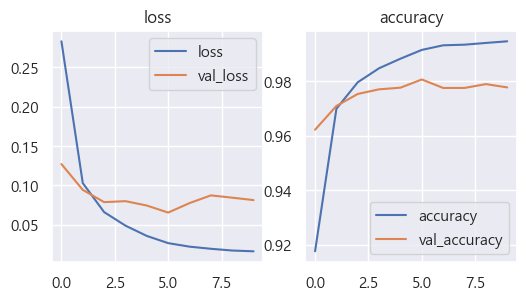

In [10]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# FC vs. CNN

<img src ="https://miro.medium.com/v2/resize:fit:640/format:webp/1*uAeANQIOQPqWZnnuH-VEyw.jpeg">
- ref : https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

<img src="https://codetorial.net/tensorflow/_images/convolutional_neural_network_05.png">

## reshape

- <b>reshape</b>

In [11]:
arr=np.arange(78400)
arr=arr.reshape(-1,28,28)
print(arr.shape)
re_arr=arr.reshape(-1,784)
print(re_arr.shape)

print(re_arr.reshape(-1,28,28,1).shape)

(100, 28, 28)
(100, 784)
(100, 28, 28, 1)


- <b>X_train_scaler.reshape

In [12]:
X_train_scaler.shape

(60000, 784)

In [13]:
X_train_scaler.reshape(60000,28,28,1).shape

(60000, 28, 28, 1)

In [14]:
X_train_scaler.reshape(-1,28,28)[:,:,:,np.newaxis].shape

(60000, 28, 28, 1)

In [15]:
X_train_scaler.reshape(-1,28,28)[...,None].shape

(60000, 28, 28, 1)

In [16]:
np.expand_dims(X_train_scaler.reshape(-1,28,28), axis=3).shape

(60000, 28, 28, 1)

In [17]:
X_train_scaler=X_train_scaler.reshape(-1,28,28,1)
X_test_scaler=X_test_scaler.reshape(-1,28,28,1)

In [18]:
X_train_scaler.shape, X_test_scaler.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## 가중치 초기화
<pre>
LOCAL.ALL_OBJECTS["ConstantV2"] = initializers_v2.Constant
LOCAL.ALL_OBJECTS["GlorotNormalV2"] = initializers_v2.GlorotNormal
LOCAL.ALL_OBJECTS["GlorotUniformV2"] = initializers_v2.GlorotUniform
LOCAL.ALL_OBJECTS["HeNormalV2"] = initializers_v2.HeNormal
LOCAL.ALL_OBJECTS["HeUniformV2"] = initializers_v2.HeUniform
LOCAL.ALL_OBJECTS["IdentityV2"] = initializers_v2.Identity
LOCAL.ALL_OBJECTS["LecunNormalV2"] = initializers_v2.LecunNormal
LOCAL.ALL_OBJECTS["LecunUniformV2"] = initializers_v2.LecunUniform
LOCAL.ALL_OBJECTS["OnesV2"] = initializers_v2.Ones
LOCAL.ALL_OBJECTS["OrthogonalV2"] = initializers_v2.Orthogonal
LOCAL.ALL_OBJECTS["RandomNormalV2"] = initializers_v2.RandomNormal
LOCAL.ALL_OBJECTS["RandomUniformV2"] = initializers_v2.RandomUniform
LOCAL.ALL_OBJECTS["TruncatedNormalV2"] = initializers_v2.TruncatedNormal
LOCAL.ALL_OBJECTS["VarianceScalingV2"] = initializers_v2.VarianceScaling
LOCAL.ALL_OBJECTS["ZerosV2"] = initializers_v2.Zeros

<pre>
<b>tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    activation=None,
    kernel_initializer='glorot_uniform',</b>
    
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    use_bias=True,
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
)

<pre>
<b>tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',</b>
    data_format=None,
)

In [19]:
from keras import Sequential
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
from keras.initializers import GlorotNormal  #Xavier

In [20]:
# model=Sequential()
# model.add(Dense(units=60,input_dim=28*28,  activation='relu', kernel_initializer='glorot_uniform')) # 입력층
# model.add(Dense(units=10,  activation='softmax'))                                                   # 히든레이어 ( 히든레이어가 2개 이상 일 경우 NN이라 할 수 있음)
# model.add(Dense(units=10,  activation='softmax'))
# model.add(Dense(units=10,  activation='softmax'))
# model.add(Dense(units=10,  activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])       # 출력층

In [21]:
model=Sequential()
#----------CNN--------------------
model.add(Conv2D(filters=16, input_shape=(28,28,1), kernel_size=(5,5), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPool2D(pool_size=(2, 2) ,strides=None,padding='valid'))
model.add(Conv2D(24, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#----------Fully Connected--------------------
model.add(Flatten())
model.add(Dense(units=60,  activation='relu', kernel_initializer='glorot_uniform')) # CNN의 경우 앞에서 데이터를 걸러주기 때문에 히든레이어를 여러개 할 필요 없음
model.add(Dense(units=10,  activation='softmax'))                                   # 분류기(최종 ouput개수 정함)를 위해 FC 사용하는 것
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

- Fully Total params: 272,270
- CNN   Total params: 33,750  --> 연산량 줄음

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 24)          9624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 24)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense_4 (Dense)             (None, 60)               

In [23]:
fit_hisroty = model.fit(X_train_scaler, y_train, validation_split=0.2, batch_size = 128, epochs=10)
print(fit_hisroty)

Epoch 1/10
375/375 [==============================] - 12s 30ms/step - loss: 0.3287 - accuracy: 0.9047 - val_loss: 0.1195 - val_accuracy: 0.9639
Epoch 2/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0925 - accuracy: 0.9719 - val_loss: 0.0708 - val_accuracy: 0.9796
Epoch 3/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0662 - accuracy: 0.9802 - val_loss: 0.0614 - val_accuracy: 0.9818
Epoch 4/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0530 - val_accuracy: 0.9854
Epoch 5/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0412 - accuracy: 0.9871 - val_loss: 0.0513 - val_accuracy: 0.9850
Epoch 6/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.0483 - val_accuracy: 0.9872
Epoch 7/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0462 - val_accuracy:

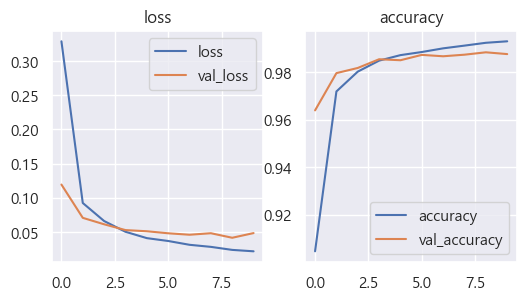

In [25]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

- Full : [0.08144471794366837, 0.9776999950408936]
- CNN  : [0.03539644554257393, 0.9889000058174133]

In [24]:
model.evaluate(X_test_scaler, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9889


[0.03539644554257393, 0.9889000058174133]

## 성능비교
- CNN이 FC에비해 연산량(parm)이 확연히 줄었음에도 loss ↓ , accuracy ↑